# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period, sma=70, stop_loss_pct=85, margin=1.5)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
285,2019-12-03,304.89,2019-12-12,312.36,7.47,10235.89,1371,278999.14,LONG,SPY
286,2020-01-27,320.20,2020-02-04,325.70,5.50,7445.92,1353,286445.06,LONG,SPY
287,2020-02-21,330.08,2020-03-04,309.67,-20.41,-27491.82,1347,258953.24,LONG,SPY
288,2020-06-11,299.29,2020-06-23,312.05,12.76,17183.75,1347,276136.99,LONG,SPY
289,2020-06-24,304.09,2020-07-02,312.23,8.14,11485.56,1411,287622.55,LONG,SPY


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-08,297622.55,297622.55,297622.55,0,297622.55,0.00,-
2020-07-09,297622.55,297622.55,297622.55,0,297622.55,0.00,-
2020-07-10,297622.55,297622.55,297622.55,0,297622.55,0.00,-
2020-07-13,297622.55,297622.55,297622.55,0,297622.55,0.00,-
2020-07-14,297622.55,297622.55,297622.55,0,297622.55,0.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                  1993-11-11
end                                                    2020-07-14
beginning_balance                                           10000
ending_balance                                          297622.55
total_net_profit                                        287622.55
gross_profit                                            517448.86
gross_loss                                             -229826.31
profit_factor                                                2.25
return_on_initial_capital                                 2876.23
annual_return_rate                                          13.57
trading_period                           26 years 8 months 3 days
pct_time_in_market                                          32.00
margin                                                       1.50
avg_leverage                                                 1.51
max_leverage                                                 1.63
min_levera

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-14 00:00:00 SELL 215 SPY @ 316.03


Plot Equity Curves: Strategy vs Benchmark

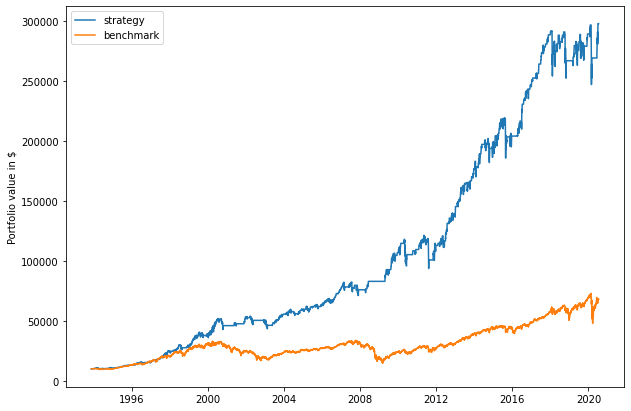

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

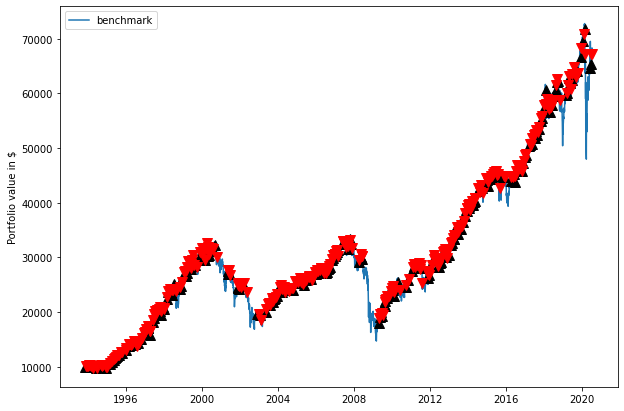

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,13.57,7.45
max_closed_out_drawdown,-22.82,-56.42
drawdown_annualized_return,-1.68,-7.57
drawdown_recovery,-0.25,-1.42
best_month,20.13,23.06
worst_month,-20.38,-31.38
sharpe_ratio,0.89,0.47
sortino_ratio,0.70,0.60
monthly_std,3.36,4.54


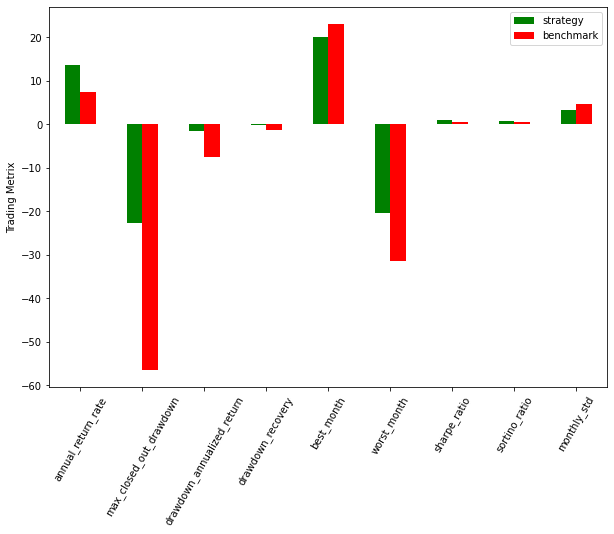

In [13]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

In [14]:
returns = dbal['close']
returns.tail()

date
2020-07-08   297622.55
2020-07-09   297622.55
2020-07-10   297622.55
2020-07-13   297622.55
2020-07-14   297622.55
Name: close, dtype: float64

In [15]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2020-07-08   68008.07
2020-07-09   67621.08
2020-07-10   68311.22
2020-07-13   67719.97
2020-07-14   67975.82
Name: close, dtype: float64

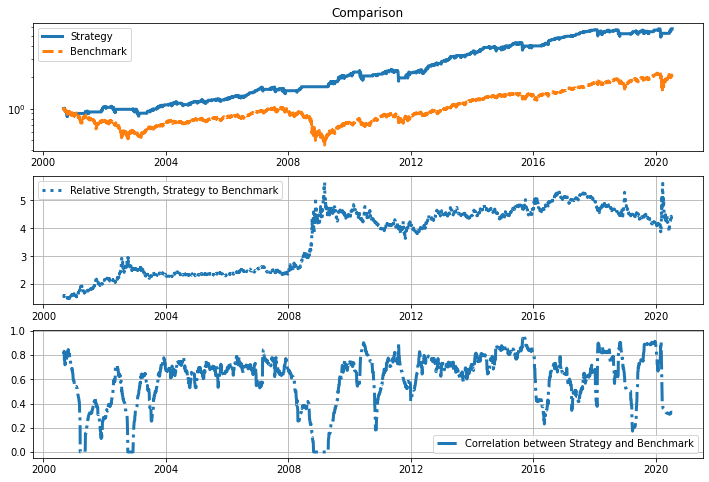

In [16]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)